In [1]:
import astropy
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt

# Morphology Data

---

In [2]:
morpho = astropy.io.fits.open('manga_visual_morpho-2.0.1.fits')
morpho_data = morpho[1].data
morpho[1].columns

ColDefs(
    name = 'Name'; format = '17A'
    name = 'plateifu'; format = '11A'
    name = 'MANGAID'; format = '9A'
    name = 'objra'; format = 'D'
    name = 'objdec'; format = 'D'
    name = 'Type'; format = '11A'
    name = 'TType'; format = 'I'; null = -32768
    name = 'Unsure'; format = 'I'; null = -32768
    name = 'Bars'; format = 'E'
    name = 'Edge_on'; format = 'I'; null = -32768
    name = 'Tidal'; format = 'I'; null = -32768
    name = 'C'; format = 'E'
    name = 'E_C'; format = 'E'
    name = 'A'; format = 'E'
    name = 'E_A'; format = 'E'
    name = 'S'; format = 'E'
    name = 'E_S'; format = 'E'
    name = 'cas_flag'; format = 'J'; null = -2147483648
)

In [3]:
# group galaxies according to their types

np.unique(morpho_data['Type'])

chararray(['BCD', 'E', 'E(dSph)', 'E+E', 'Edc', 'Irr', 'IrrAB', 'IrrB',
           'S', 'S-merger', 'S0', 'S0(dwarf)', 'S0a', 'SAB', 'SAB-merger',
           'SAB0', 'SAB0a', 'SABa', 'SABab', 'SABb', 'SABbc', 'SABc',
           'SABcd', 'SABd', 'SABdm', 'SABm', 'SB0', 'SB0a', 'SBa', 'SBab',
           'SBb', 'SBbc', 'SBc', 'SBcd', 'SBd', 'SBdm', 'SBm', 'Sa',
           'Sab', 'Sb', 'Sbc', 'Sc', 'Scd', 'Sd', 'Sdm', 'Sm', 'dIrr',
           'dSph', 'dwarf', 'interacting'], dtype='<U11')

In [4]:
# VERY IMPORTANT: GET RID OF REDUNDANT CHARACTERS!!!
types = np.char.strip(morpho_data['Type'])

early_types = ['E', 'E(dSph)', 'E+E', 'Edc', 'S0', 'S0a', 'S0(dwarf)', 'SAB0', 'SB0', 'SB0a', 'dSph']
late_types = ['Sa', 'Sb', 'Sbc', 'Sc', 'Sd', 'Sm', 'Sab', 'Sbc', 'Scd', 'SAB', 'SABa', 'SABb', 'SABbc', 'SABcd',
              'SBa', 'SBb', 'SBbc', 'SBcd', 'SBdm', 'SBm', 'S-merger', 'Irr', 'IrrAB', 'IrrB', 'dIrr', 'BCD', 'dwarf']

early_mask = np.isin(types, early_types)
early_galaxies = morpho_data[early_mask]

late_mask = np.isin(types, late_types)
late_galaxies = morpho_data[late_mask]

print(f"Number of early-type galaxies: {len(early_galaxies)}")
print(f"Number of late-type galaxies: {len(late_galaxies)}")
print(f'Number of all galaxies: {len(morpho_data)}')

Number of early-type galaxies: 3626
Number of late-type galaxies: 4975
Number of all galaxies: 10126


# AGN Data

---

In [7]:
agn = astropy.io.fits.open('manga_agn-v2_0_1.fits')
agn_data = agn[1].data
agn[1].columns

ColDefs(
    name = 'MANGAID'; format = '17A'
    name = 'RA'; format = 'E'
    name = 'DEC'; format = 'E'
    name = 'Z'; format = 'E'
    name = 'WISE_AGN'; format = 'I'
    name = 'LOG_LBOL_WISE'; format = 'E'
    name = 'LOG_LBOL_WISE_ERR'; format = 'E'
    name = 'BAT_AGN'; format = 'I'
    name = 'LOG_LBOL_BAT'; format = 'E'
    name = 'LOG_LBOL_BAT_ERR'; format = 'E'
    name = 'RADIO_AGN'; format = 'I'
    name = 'LOG_LBOL_RADIO'; format = 'E'
    name = 'LOG_LBOL_RADIO_ERR'; format = 'E'
    name = 'RADIO_CLASS'; format = '4A'
    name = 'BROAD_AGN'; format = 'I'
    name = 'LOG_LBOL_BROAD'; format = 'E'
    name = 'LOG_LBOL_BROAD_ERR'; format = 'E'
)

In [12]:
# group AGN data according to the hosting galaxy types

early_mask = np.isin(agn_data['MANGAID'], early_galaxies['Name'])
early_agn = agn_data[early_mask]

late_mask = np.isin(agn_data['MANGAID'], late_galaxies['Name'])
late_agn = agn_data[late_mask]

print(f"Number of early-type galaxies with AGNs: {len(early_agn)}")
print(f"Number of late-type galaxies with AGNs: {len(late_agn)}")

Number of early-type galaxies with AGNs: 236
Number of late-type galaxies with AGNs: 112


# Plots

---

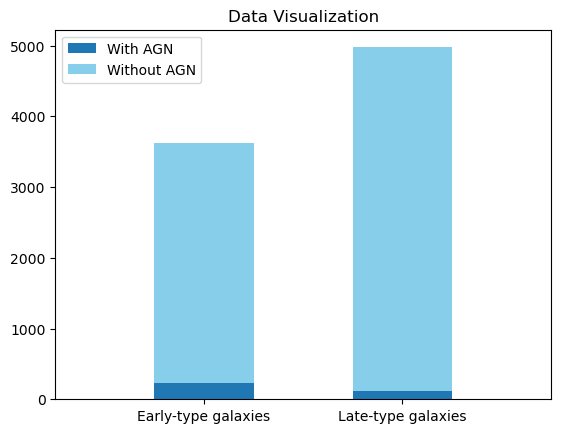

In [82]:
# plotting parameters
x = [0.3, 0.7]
bar_width = 0.2
prop_cycle = plt.rcParams['axes.prop_cycle'] # colors
colors = prop_cycle.by_key()['color']

plt.bar(x[0], len(early_agn), width=bar_width, color=colors[0], label='With AGN')
plt.bar(x[0], len(early_galaxies) - len(early_agn), width=bar_width, bottom=len(early_agn), color='skyblue', label='Without AGN')
plt.bar(x[1], len(late_agn), width=bar_width, color=colors[0])
plt.bar(x[1], len(late_galaxies) - len(late_agn), bottom=len(late_agn), width=bar_width, color='skyblue')
plt.legend()
plt.xticks(x, ['Early-type galaxies', 'Late-type galaxies'])
plt.xlim(0, 1)
plt.title('Data Visualization');